This project is a hands-on practice to learn linear regression using the Kaggle House Prices dataset. The goal is to predict house prices based on various features, exploring data preprocessing, model training, and evaluation techniques.

In [ ]:
!pip install colorama

In [ ]:
# import essential libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from colorama import Fore, Style, init
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset:

data_path = '/content/drive/MyDrive/ML_practice_datasets/Regression_Housing_price/Housing.csv'
df = pd.read_csv(data_path)

In [ ]:
# Create the dataframe of the data:

df = pd.DataFrame(df)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Let's see some informations about the Dataset:

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Let me tell you about the columns and describe what does each column mean:



In [ ]:
# Define column descriptions:

column_info = {
    "price": "The selling price of the house (target variable).",
    "area": "The total built-up area of the house.",
    "bedrooms": "Number of bedrooms in the house.",
    "bathrooms": "Number of bathrooms in the house.",
    "stories": "Number of floors or stories in the house.",
    "mainroad": "Whether the house has access to the main road (yes/no).",
    "guestroom": "Whether there is a guest room (yes/no).",
    "basement": "Whether the house has a basement (yes/no).",
    "hotwaterheating": "Availability of hot water heating system (yes/no).",
    "airconditioning": "Whether the house has air conditioning (yes/no).",
    "parking": "Number of parking spots available.",
    "prefarea": "Whether the house is in a preferred residential area (yes/no).",
    "furnishingstatus": "Furnishing status of the house (furnished/semi-furnished/unfurnished)."
}


column_description_df = pd.DataFrame(list(column_info.items()), columns=["Column Name", "Description"])


column_description_df


,Column Name,Description
0,price,The selling price of the house (target variable).
1,area,The total built-up area of the house.
2,bedrooms,Number of bedrooms in the house.
3,bathrooms,Number of bathrooms in the house.
4,stories,Number of floors or stories in the house.
5,mainroad,Whether the house has access to the main road ...
6,guestroom,Whether there is a guest room (yes/no).
7,basement,Whether the house has a basement (yes/no).
8,hotwaterheating,Availability of hot water heating system (yes/...
9,airconditioning,Whether the house has air conditioning (yes/no).


In [ ]:
# The count of rows and columns in this dataset :
df.shape

(545, 13)

In [ ]:
# Let's find out are there any duplicated datas:

df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [ ]:
# get the count of null and nan values :

df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


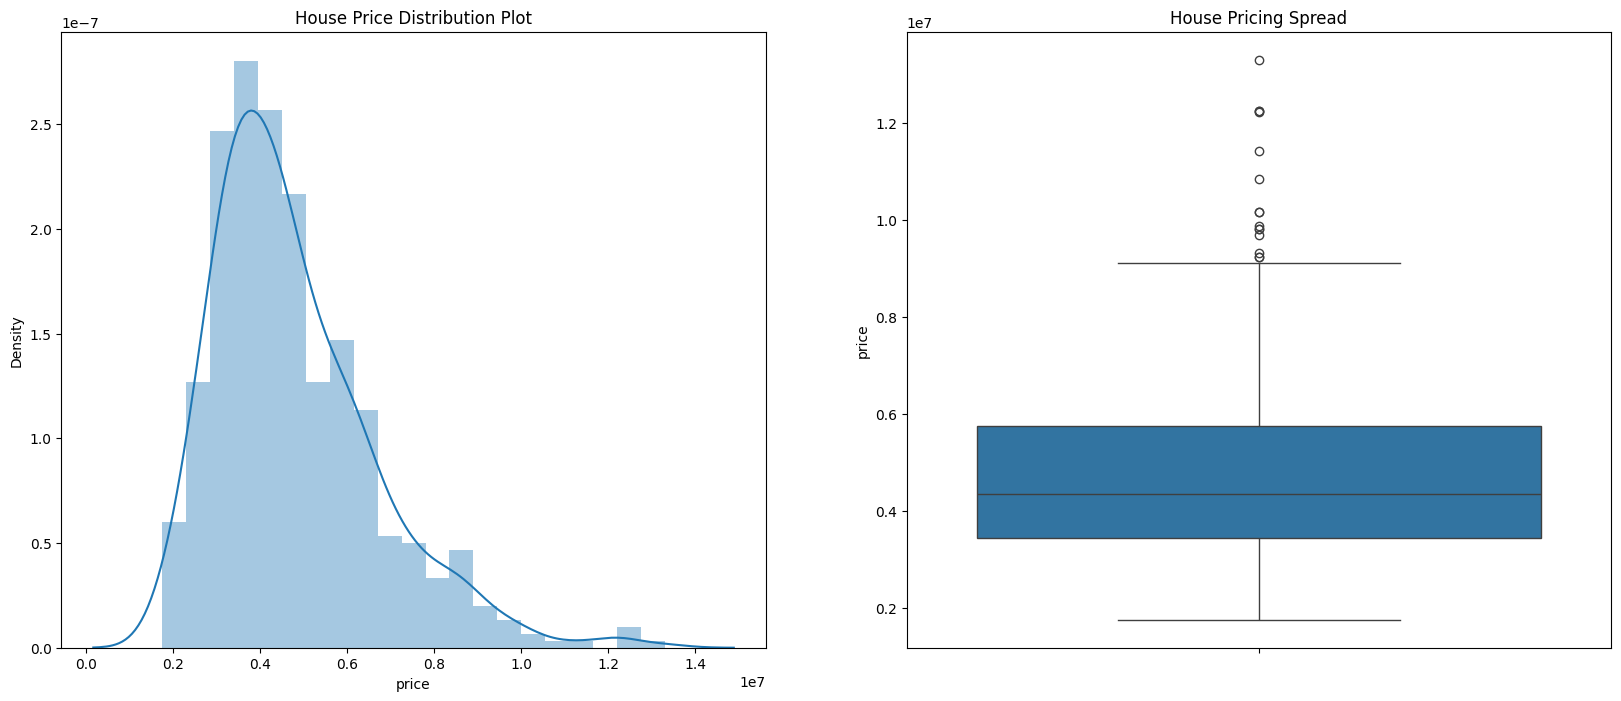

In [ ]:
# Let's have some EDA and Visualizations :

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

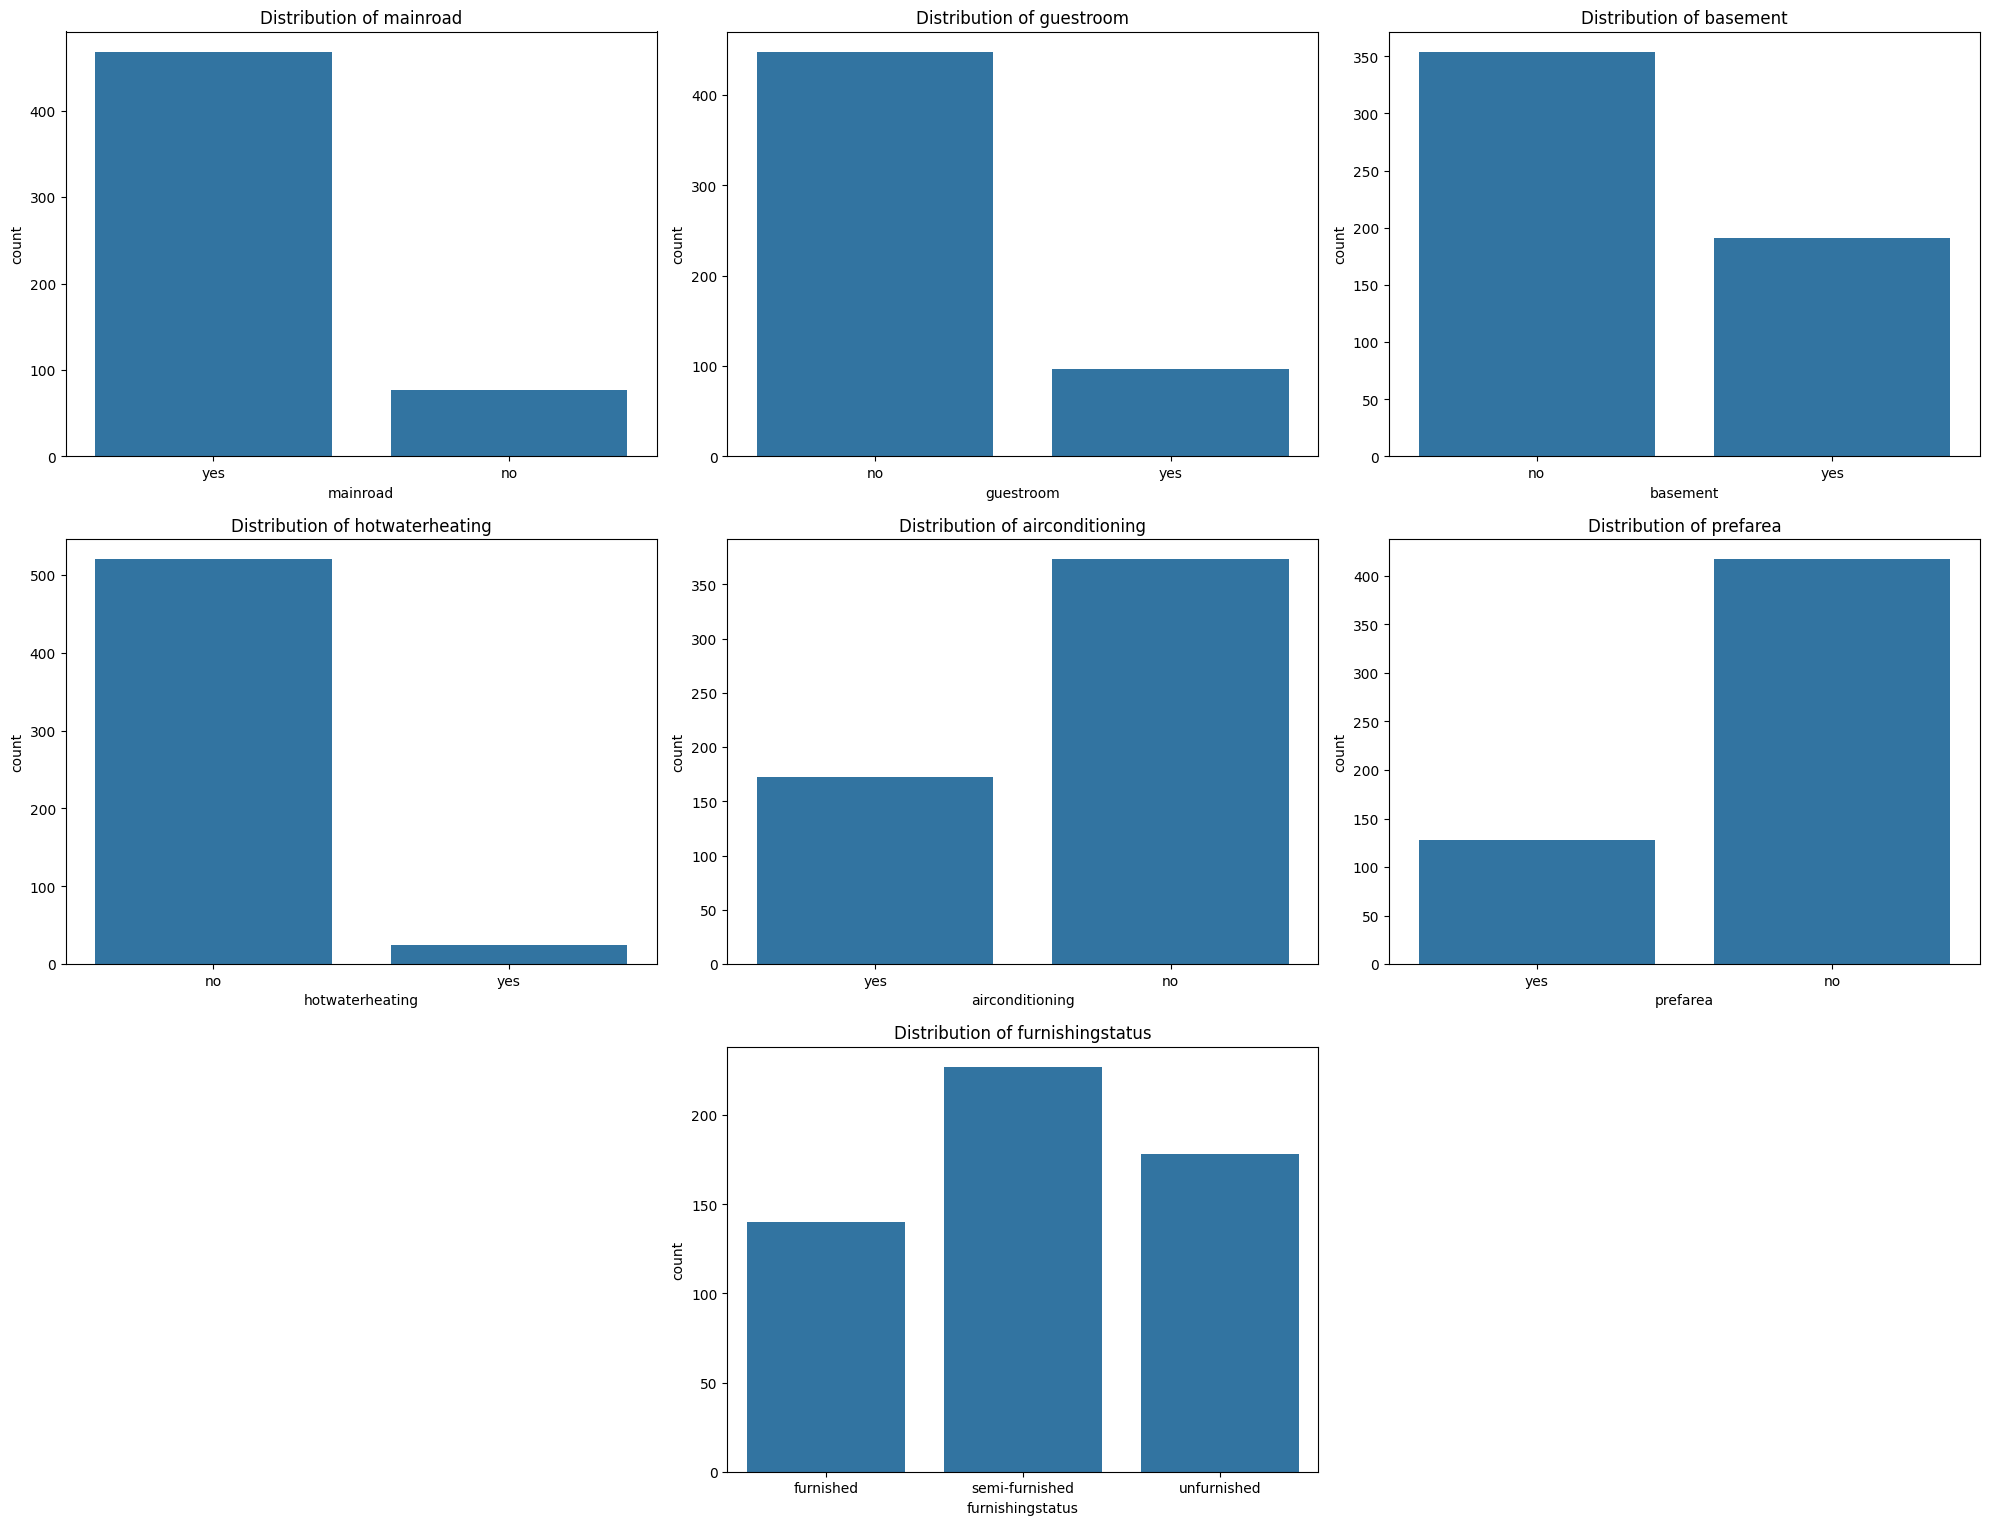

In [ ]:
# Visualising Categorical Data :

cat_features = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea',
    'furnishingstatus'
]

fig = plt.figure(figsize=(20, 15))

gs = gridspec.GridSpec(3,3,figure=fig)

for i , col in enumerate(cat_features):
  if i < 3 :
    ax = fig.add_subplot(gs[0,i])
  elif i < 6 :
    ax = fig.add_subplot(gs[1,i-3])
  else:
    ax = fig.add_subplot(gs[2,1])


  sns.countplot(x = col , data = df , ax = ax)
  ax.set_title(f'Distribution of {col}')


plt.tight_layout()
plt.subplots_adjust(top=0.999)
plt.show()

In [ ]:
# Let's find noise or outlier datas in categorical columns:

for col in cat_features:
  print(df[col].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


Since none of the values have very low counts, and based on the plots they are not outside the valid range, and there are no typos, we conclude that there is no noisy data in these columns.


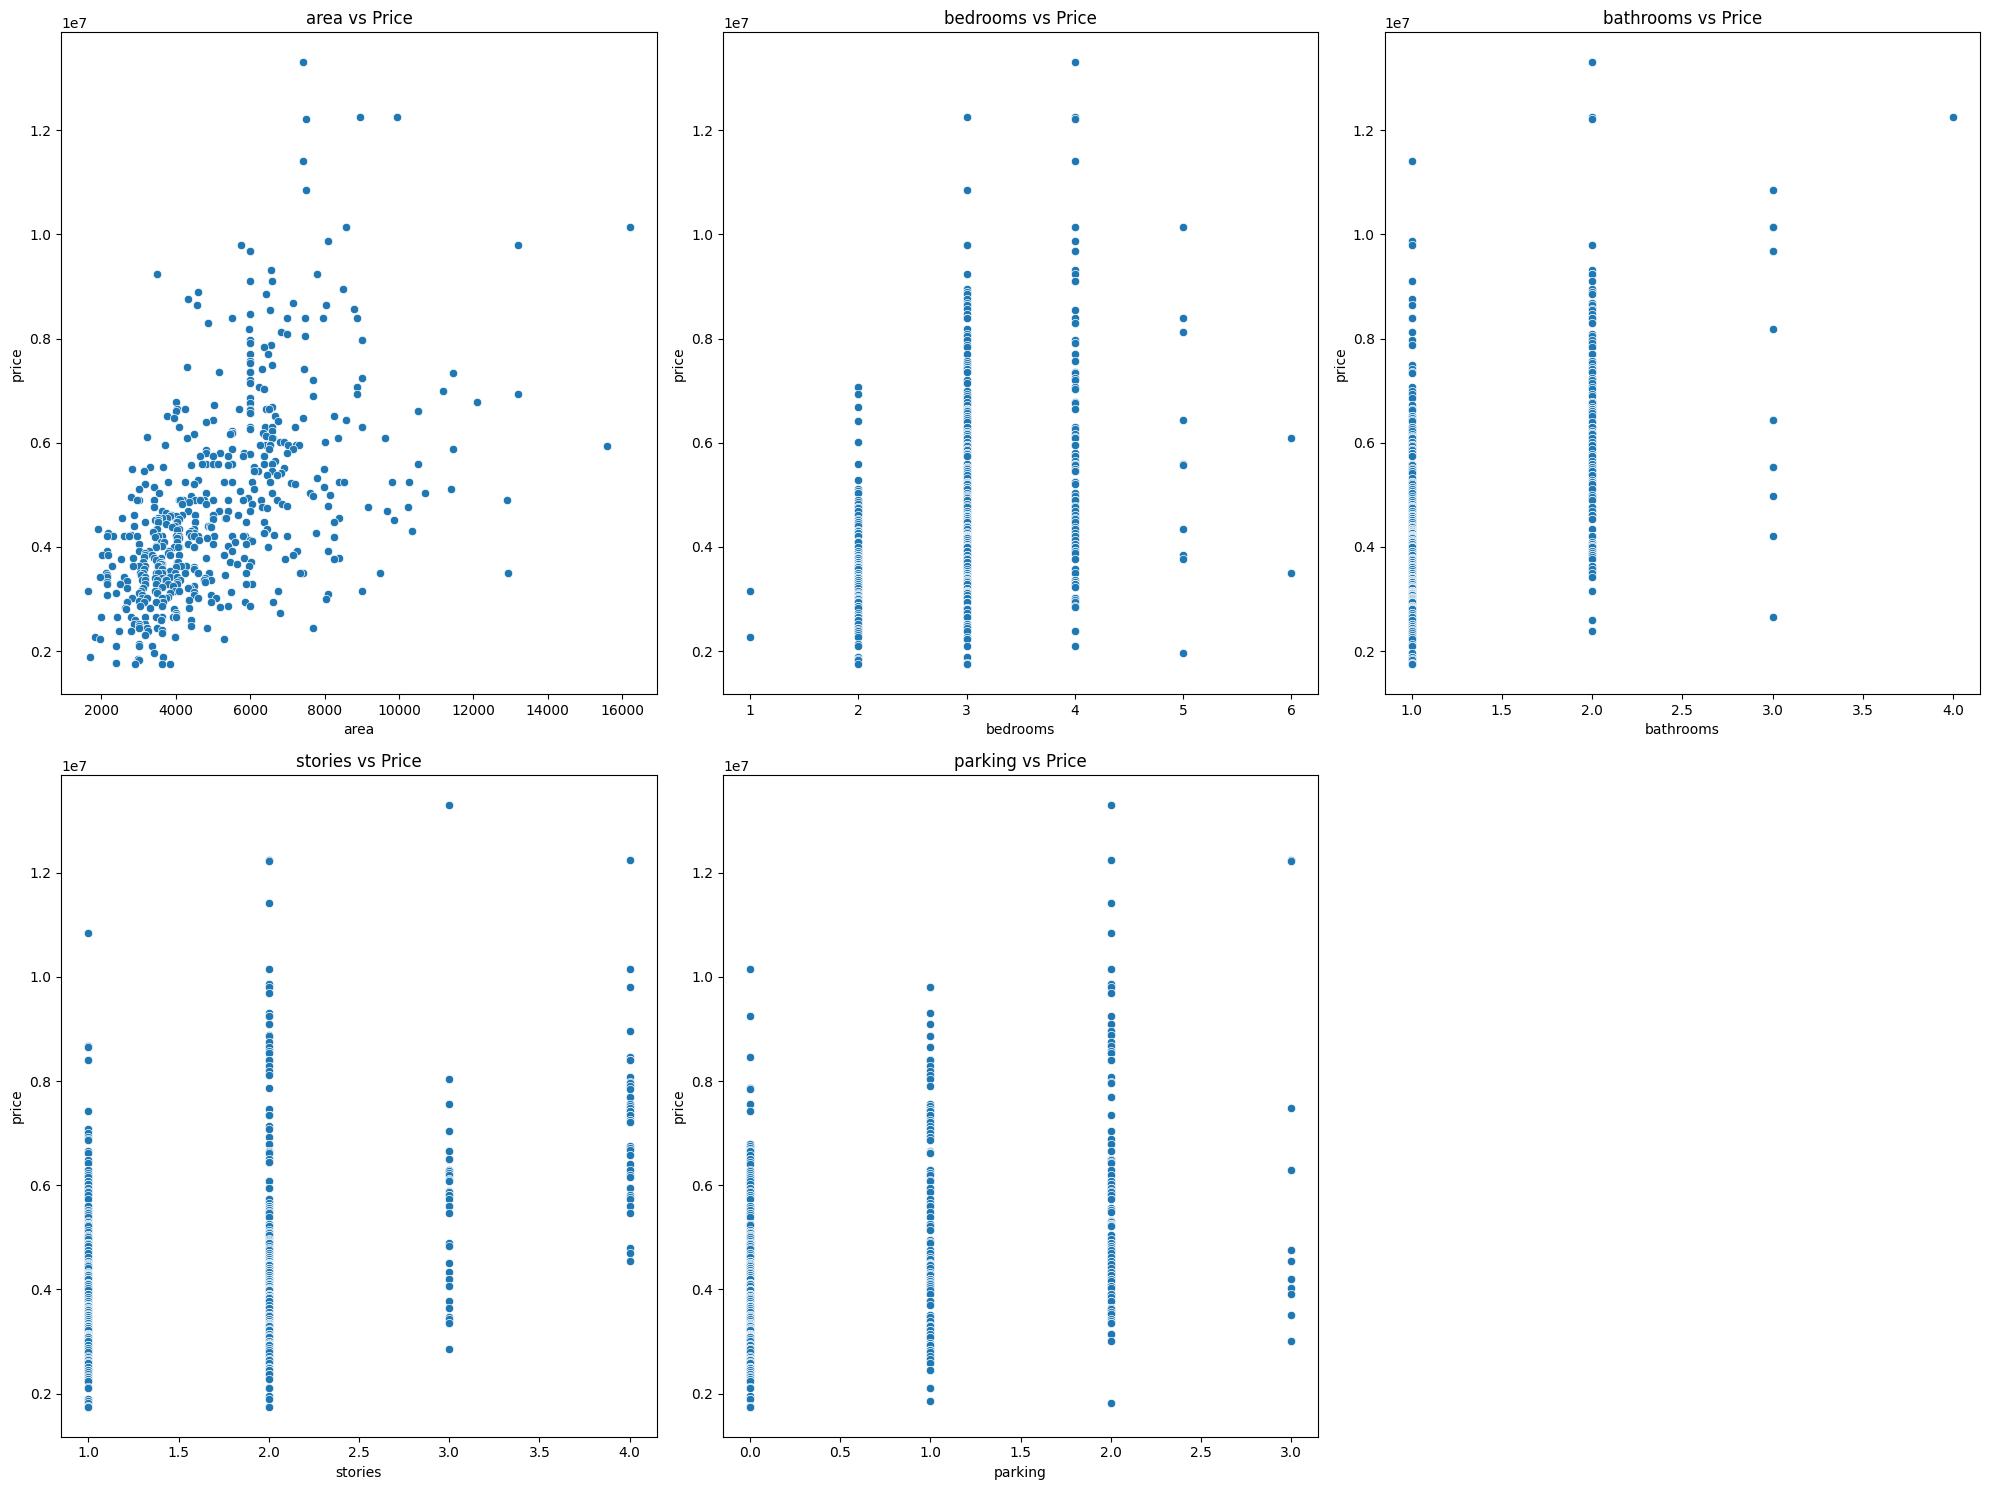

In [ ]:
# Visualising numerical Data :

num_features = df.select_dtypes(include='number').columns.tolist()
num_features.remove('price')

plt.figure(figsize=(20, 15))

for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')

plt.tight_layout()
plt.show()

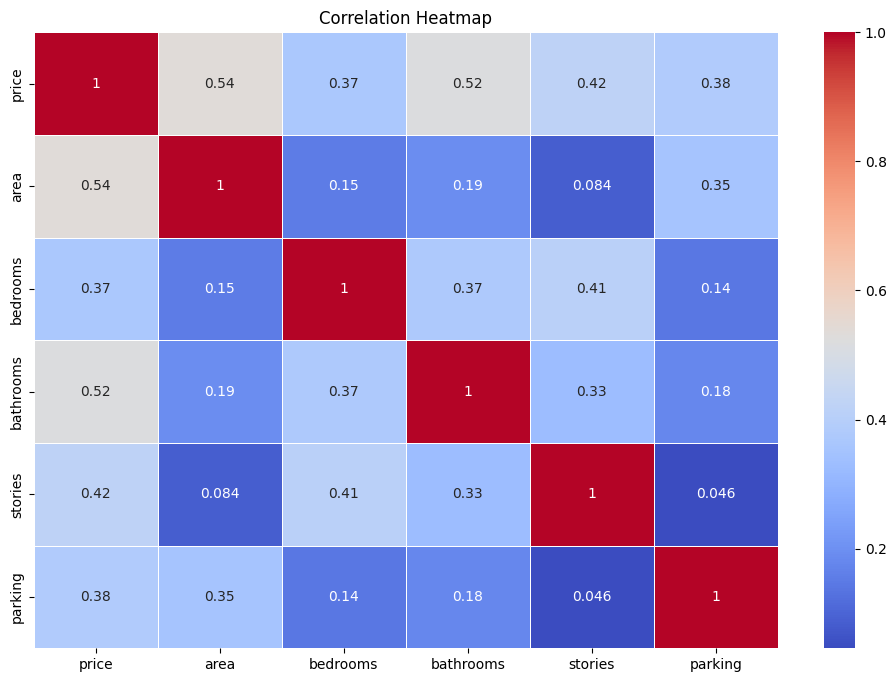

In [ ]:
# Now let’s check the correlation of each numerical feature with the target variable:

num_features = num_features = df.select_dtypes(include='number').columns.tolist()
cor_matrix= df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

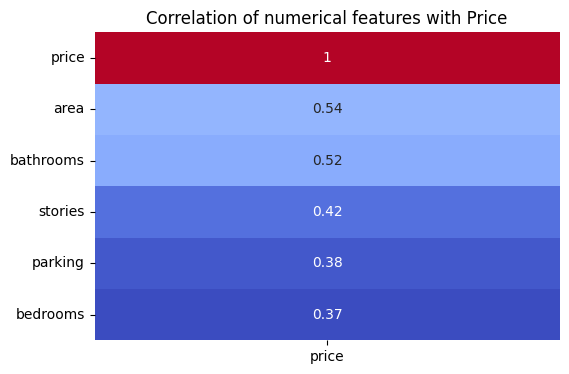

In [ ]:
# we need just corelations between price and other columns:

cor_target = df[num_features].corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(cor_target.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation of numerical features with Price')
plt.show()

As shown, the price is more strongly related to the area and the number of bathrooms
.

Sometimes a high correlation coefficient can result from noisy or random data. To check whether these two features are truly significant, we calculate their p-values.

In [ ]:
# coef and p-value for area

r, p_value = pearsonr(df['area'], df['price'])

print(f"area Correlation: {r:.3f}")
print(f"area P-value: {p_value:.3f}")

# coef and p-value for number of bathrooms
r, p_value = pearsonr(df['bathrooms'], df['price'])
print(f"Number of bathroom Correlation: {r:.3f}")
print(f"Number of bathroom P-value: {p_value:.3f}")

area Correlation: 0.536
area P-value: 0.000
Number of bathroom Correlation: 0.518
Number of bathroom P-value: 0.000


Now that the p-values for both came out as zero, we can be confident that both features are significant and their high correlation is not due to randomness:))

 Since machine learning algorithms work only with numerical values (like 0 and 1), we need to convert the categorical features that are stored as ‘yes’ and ‘no’ into 0 and 1, so we can use them later in the model.


In [ ]:
cat_features = ['mainroad', 'guestroom', 'hotwaterheating', 'basement',
                'airconditioning', 'prefarea', 'furnishingstatus']


for col in cat_features:
    if col != 'furnishingstatus':
        df[col] = df[col].map({'yes': 1, 'no': 0})



furnish_cols = ['furnished', 'semi-furnished', 'unfurnished']
for status in furnish_cols:
    df[status] = (df['furnishingstatus'] == status).astype(int)


df.drop(columns=['furnishingstatus'], inplace=True)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [ ]:
df.shape

(545, 15)

Before modeling, it is better to normalize the numerical features because, in linear regression, it is important for all columns to be on a reasonable scale so that the model can learn the coefficients correctly

In [ ]:
numerical_features = ['area' , 'bedrooms' , 'bathrooms' , 'stories' , 'parking']

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1,0,0


It's time to have a model to predict the price and here is the splitting the data:

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [ ]:
# Now let’s define the features and the target

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

To examine which features contribute the most to predicting the output, we use RFE. Additionally, since some features are highly correlated with each other, we use VIF to identify and remove features with high multicollinearity

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
results = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

for col, selected, rank in results:
    color = Fore.GREEN if selected else Fore.RED
    print(f"{col:<20} {color}{selected:<6} {Style.RESET_ALL} Rank: {rank}")

area                 1       Rank: 1
bedrooms             0       Rank: 5
bathrooms            1       Rank: 1
stories              1       Rank: 1
mainroad             1       Rank: 1
guestroom            1       Rank: 1
basement             1       Rank: 1
hotwaterheating      1       Rank: 1
airconditioning      1       Rank: 1
parking              0       Rank: 2
prefarea             1       Rank: 1
furnished            0       Rank: 3
semi-furnished       0       Rank: 4
unfurnished          1       Rank: 1


In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,unfurnished
333,-0.991879,-0.570187,0.22441,1,0,0,0,0,0,0
429,-0.173208,-0.570187,0.22441,1,0,0,0,0,0,1
18,-0.253922,1.421812,0.22441,1,1,0,0,1,0,0
480,-0.770492,-0.570187,0.22441,0,0,0,0,0,0,0
505,-0.530656,-0.570187,0.22441,1,0,0,0,1,0,1


In [ ]:
def build_first_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_first_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     74.94
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           4.76e-85
Time:                        20:09:20   Log-Likelihood:                -6241.7
No. Observations:                 408   AIC:                         1.251e+04
Df Residuals:                     397   BIC:                         1.255e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.735e+06    1.7e+05     

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.11
6,basement,1.28
3,stories,1.26
5,guestroom,1.22
1,area,1.21
2,bathrooms,1.20
8,airconditioning,1.19
4,mainroad,1.14
9,prefarea,1.12
10,unfurnished,1.06


In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

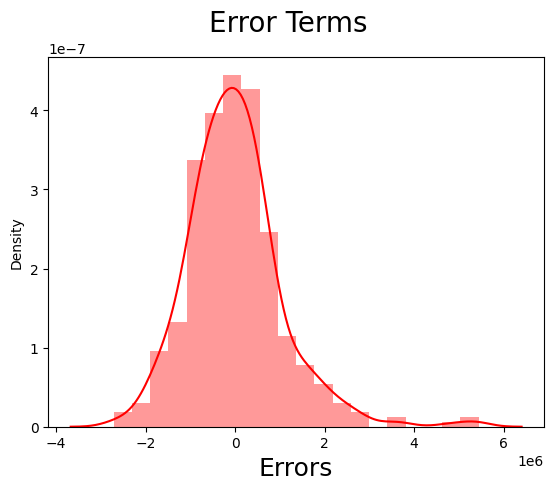

In [ ]:
fig = plt.figure()
sns.distplot(
    (y_train - y_train_price),
    bins=20,
    color='red'
)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)


In [ ]:
X_train_new

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,unfurnished
333,1.0,-0.991879,-0.570187,0.224410,1,0,0,0,0,0,0
429,1.0,-0.173208,-0.570187,0.224410,1,0,0,0,0,0,1
18,1.0,-0.253922,1.421812,0.224410,1,1,0,0,1,0,0
480,1.0,-0.770492,-0.570187,0.224410,0,0,0,0,0,0,0
505,1.0,-0.530656,-0.570187,0.224410,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,-0.908859,-0.570187,-0.929397,1,0,0,0,0,0,1
53,1.0,-0.000250,1.421812,2.532024,1,0,0,0,1,0,0
350,1.0,-0.798165,-0.570187,0.224410,1,0,0,1,0,0,0
79,1.0,0.391790,1.421812,1.378217,1,1,0,0,1,0,0


In [ ]:
# Let's scaling test set
numerical_list = ['area' ,'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea', 'unfurnished' ]
df_train[numerical_list] = scaler.fit_transform(df_train[numerical_list])
df_test[numerical_list] = scaler.transform(df_test[numerical_list])

In [ ]:

X_train_new = X_train_new.drop('const',axis=1)

X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [ ]:
y_pred = lm.predict(X_test_new)

In [ ]:
r2_score(y_test, y_pred)

0.15432651575625755

Text(0, 0.5, 'y_pred')

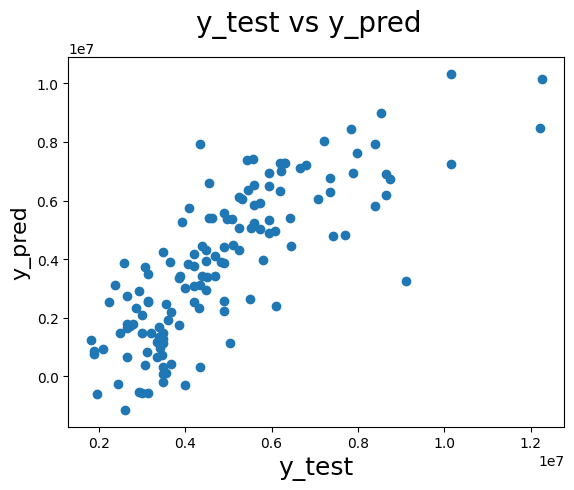

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

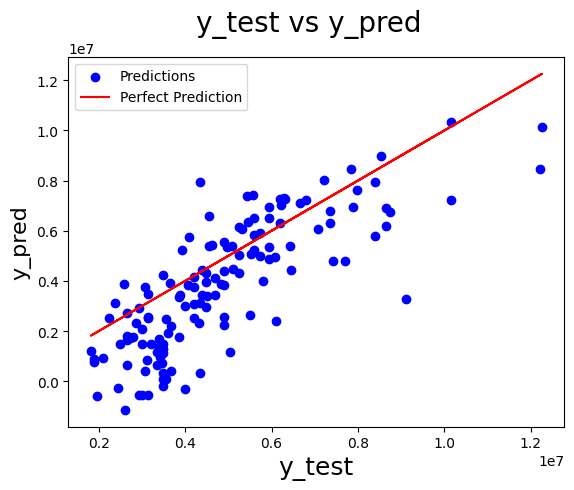

In [ ]:
fig = plt.figure()


plt.scatter(y_test, y_pred, color='blue', label='Predictions')


plt.plot(y_test, y_test, color='red', label='Perfect Prediction')

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.legend()
plt.show()


In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     74.94
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           4.76e-85
Time:                        20:16:20   Log-Likelihood:                -6241.7
No. Observations:                 408   AIC:                         1.251e+04
Df Residuals:                     397   BIC:                         1.255e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.735e+06    1.7e+05     